# Data dimensionality, distance-based classifiers

In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist

train_in = pd.read_csv('/content/train_in.csv', header=None).to_numpy()
train_out = pd.read_csv('/content/train_out.csv', header=None).to_numpy()

test_in = pd.read_csv('/content/test_in.csv', header=None).to_numpy()
test_out = pd.read_csv('/content/test_out.csv', header=None).to_numpy()

In [ ]:
labels = train_out.flatten()
unique_labels = np.unique(labels)
cloud_centers = np.array([np.mean(train_in[labels == i], axis=0) for i in range(10)])

distance = cdist(test_in, cloud_centers, 'euclidean')
test_predicted_labels = np.argmin(distance, axis=1)

correct_predictions = np.sum(test_out.flatten() == test_predicted_labels)
print("The number of images correctly predicted is:", correct_predictions)

The number of images correctly predicted is: 804


In [ ]:
distances_between_centers = cdist(cloud_centers, cloud_centers, 'euclidean')

for i in range(len(unique_labels)):
    for j in range(i + 1, len(unique_labels)):
        print(f"Distance between Center {i} and Center {j}: {distances_between_centers[i][j]}")

Distance between Center 0 and Center 1: 14.44960796590658
Distance between Center 0 and Center 2: 9.334555870229647
Distance between Center 0 and Center 3: 9.143733671882783
Distance between Center 0 and Center 4: 10.769844437633486
Distance between Center 0 and Center 5: 7.519296259597182
Distance between Center 0 and Center 6: 8.154443125778972
Distance between Center 0 and Center 7: 11.864555054634078
Distance between Center 0 and Center 8: 9.907901737320389
Distance between Center 0 and Center 9: 11.488874937417041
Distance between Center 1 and Center 2: 10.125322577096671
Distance between Center 1 and Center 3: 11.73323290183107
Distance between Center 1 and Center 4: 10.173786431281787
Distance between Center 1 and Center 5: 11.118800407467436
Distance between Center 1 and Center 6: 10.614700366283566
Distance between Center 1 and Center 7: 10.74315367352473
Distance between Center 1 and Center 8: 10.086776773038185
Distance between Center 1 and Center 9: 9.932093699343708
Distan

Analyzing the distances, the pairs of images that might be difficult to separate are: 4 and 9; 3 and 5; 8 and 9

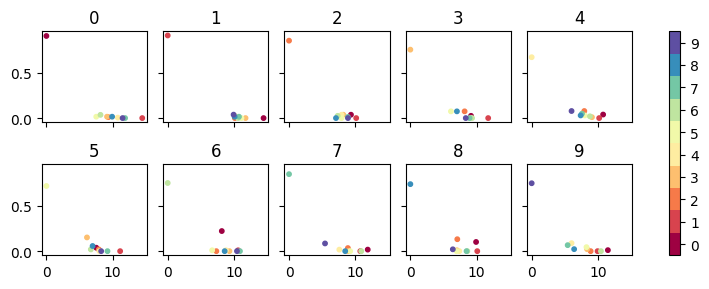

'\nTake subplot 0 as an example. It come from the information of 0 samples.\nY is the proprotion (number of predicted label / number of 0)\nX is the distance (distance between predicted lable and 0)\nThe red point is 0 (get from the colorbar).\nx is around 0.9, which mean that 90% of 0 samples are classed as 0.\ny is 0. Because it is the distance under the same label.\n'

In [ ]:
# make label pairs : (predicted lable, true lable)
combined_lables = np.column_stack((test_predicted_labels, test_out))

inter_class_couts = np.zeros((10,10))

# count matrix
# inter_class_count[n][m] : the number of samples belonged to label n had been classed as label m.
for pair in combined_lables:
  n,m = pair[0], pair[1]
  inter_class_couts[n][m] += 1

row_sums = np.sum(inter_class_couts, axis=1)
proportion = inter_class_couts / row_sums[:, None]

import matplotlib.pyplot as plt
color = np.arange(10)

fig, ax = plt.subplots(2,5, sharex='all', sharey='all', figsize=(8,3))
ax = ax.flatten()
for i in range(10):
  a = ax[i].scatter(distances_between_centers[i], proportion[i], c=color, cmap='Spectral', s=10)
  ax[i].set_title(i)

fig.tight_layout()

fig.colorbar(a, ax = ax, boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

plt.show()

'''
Take subplot 0 as an example. It come from the information of 0 samples.
Y is the proprotion (number of predicted label / number of 0)
X is the distance (distance between predicted lable and 0)
The red point is 0 (get from the colorbar).
x is around 0.9, which mean that 90% of 0 samples are classed as 0.
y is 0. Because it is the distance under the same label.
'''

### PCA

In [ ]:
import numpy as np
import pandas as pd

train_in = pd.read_csv('/content/train_in - Copy.csv', header=None).to_numpy()
train_out = pd.read_csv('/content/train_out - Copy.csv', header=None).to_numpy()

In [ ]:
# Preprocessing

from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(train_in)
#X = train_in

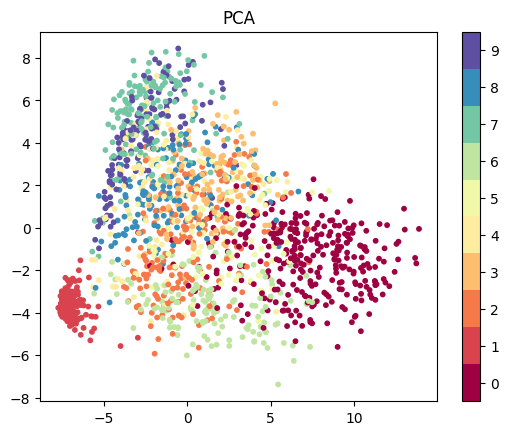

In [ ]:
# Perform PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

# Plot the results
import numpy as np
import matplotlib.pyplot as plt
plt.subplots()
color = train_out.astype(int)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=color, cmap='Spectral', s=10)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('PCA')

plt.show()

### T-SNE

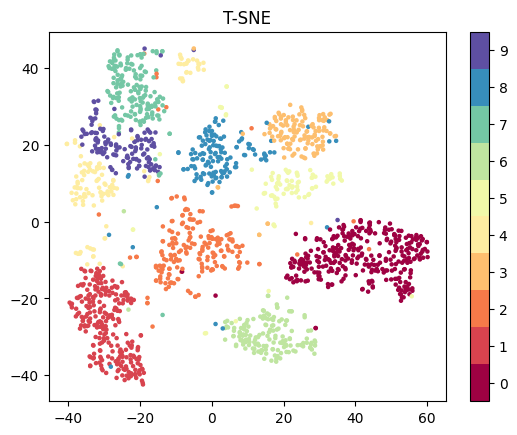

In [ ]:
# Perform T-SNE

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

plt.subplots()
color = train_out.astype(int)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color, cmap="Spectral", s=5)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title("T-SNE")

plt.show()

### U-MAP

In [ ]:
!pip install umap-learn
import umap
import matplotlib.pyplot as plt

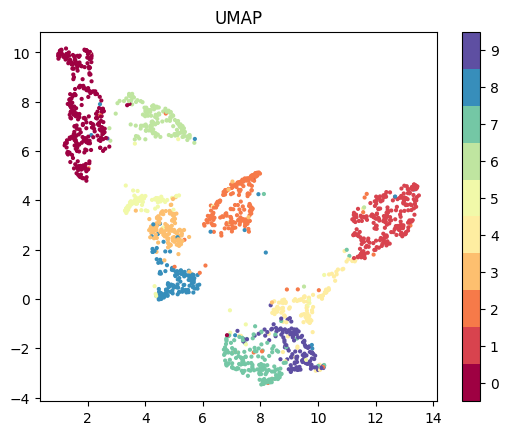

In [ ]:
u_map = umap.UMAP(random_state=42)
X_umap = u_map.fit_transform(X)

fig, ax = plt.subplots()
color = train_out.astype(int)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=color, cmap="Spectral", s=4)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title("UMAP")

plt.show()

## Nearest mean classifier

Accuracy of Nearest Mean Classifier: 80.4
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.79      0.85       224
           1       0.91      0.99      0.95       121
           2       0.85      0.68      0.76       101
           3       0.75      0.77      0.76        79
           4       0.67      0.80      0.73        86
           5       0.72      0.69      0.70        55
           6       0.75      0.87      0.80        90
           7       0.85      0.78      0.81        64
           8       0.74      0.79      0.76        92
           9       0.75      0.77      0.76        88

    accuracy                           0.80      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.81      0.80      0.80      1000



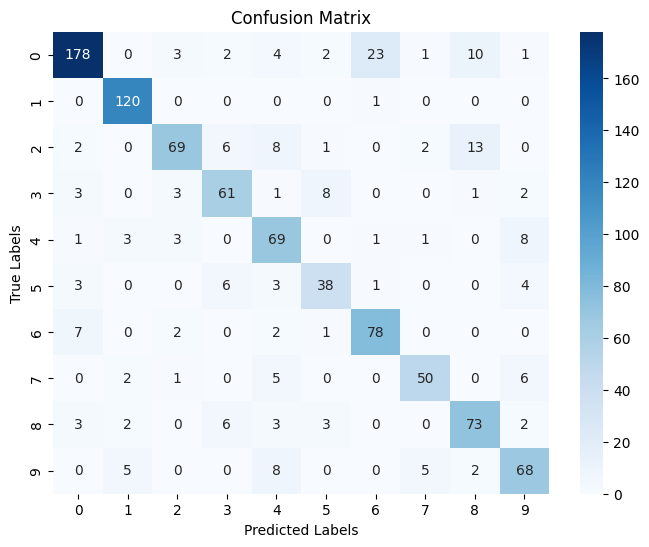

In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

train_in = pd.read_csv('/content/train_in.csv', header=None).to_numpy()
train_out = pd.read_csv('/content/train_out.csv', header=None).to_numpy()

test_in = pd.read_csv('/content/test_in - Copy.csv', header=None).to_numpy()
test_out = pd.read_csv('/content/test_out - Copy.csv', header=None).to_numpy()

labels = train_out.flatten()
unique_labels = np.unique(labels)
cloud_centers = np.array([np.mean(train_in[labels == i], axis=0) for i in range(10)])

# Implement the nearest mean classifier
def nearest_mean_classifier(dataset, class_means):
    predictions = []

    for sample in dataset:
        nearest_class = None
        min_distance = float('inf')

        for i, mean in enumerate(class_means):
            distance = np.linalg.norm(sample - mean)

            if distance < min_distance:
                min_distance = distance
                nearest_class = unique_labels[i]

        predictions.append(nearest_class)

    return predictions


# Use the classifier to predict the test set
y_pred = nearest_mean_classifier(test_in, cloud_centers)

# Calculate accuracy
accuracy = accuracy_score(test_out.flatten(), y_pred)
print("Accuracy of Nearest Mean Classifier:", accuracy*100)

# Create a confusion matrix
cm = confusion_matrix(test_out.flatten(), y_pred)

report = classification_report(test_out.flatten(), y_pred)
print("Classification Report:")
print(report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()




## KNN (K-Nearest-Neighbor) classifier


Accuracy of K-Nearest Neighbors Classifier: 90.8
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       224
           1       0.91      0.98      0.94       121
           2       0.93      0.83      0.88       101
           3       0.82      0.89      0.85        79
           4       0.94      0.92      0.93        86
           5       0.95      0.64      0.76        55
           6       0.94      0.94      0.94        90
           7       0.86      0.88      0.87        64
           8       0.95      0.86      0.90        92
           9       0.88      0.93      0.91        88

    accuracy                           0.91      1000
   macro avg       0.91      0.88      0.89      1000
weighted avg       0.91      0.91      0.91      1000



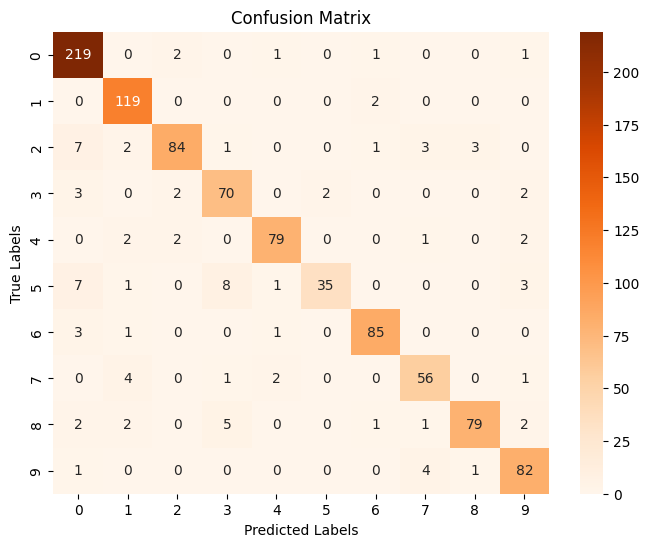

In [ ]:
# Create and fit a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust k (number of neighbors) as needed
knn_classifier.fit(train_in, labels)

# Make predictions on the test set
y_pred = knn_classifier.predict(test_in)

# Calculate accuracy
accuracy = accuracy_score(test_out.flatten(), y_pred)
print("Accuracy of K-Nearest Neighbors Classifier:", accuracy*100)

# Create a confusion matrix with a different color map
cm = confusion_matrix(test_out.flatten(), y_pred)
report = classification_report(test_out.flatten(), y_pred)
print("Classification Report:")
print(report)


# Plot the confusion matrix with a custom colormap ("Oranges")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

plt.show()

# Multi-class perceptron algorithm

MultiClass Perceptron performance for different way of initializing the weights (epochs = 20; learning_rate = 0.1)

1.
```
np.random.uniform(-0.1, 0.1, size=(self.features + 1, self.nodes))
```
Test accuracy = 0.8720

2.
```
np.zeros((self.features + 1, self.nodes))
```
Test accuracy = 0.8660

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class MultiClassPerceptron:

    def __init__(self, num_nodes, num_features, learning_rate, num_epochs):
        self.nodes = num_nodes
        self.features = num_features
        self.lrate = learning_rate
        self.epochs = num_epochs

        # initialize the weights
        self.w = np.random.uniform(-0.1, 0.1, size=(self.features + 1, self.nodes))
        # self.w = np.zeros((self.features + 1, self.nodes))

        # define the softmax activation function
        self.activation_function = lambda x: np.exp(x) / np.sum(np.exp(x), axis=0)

    def train(self, train_data, train_targets):
        for epoch in range(self.epochs):

            # track efficiency of particular epoch
            correct_predictions = 0
            total_ce_loss = 0

            for i in range(len(train_data)):

                # add a bias
                x = np.append(train_data[i], 1.0)

                # calculate output of the network
                output = np.dot(x, self.w)
                softmax_output = self.activation_function(output)

                # choose the most-probability output class
                prediction = np.argmax(softmax_output)

                # calculate the cross-entropy loss
                ce_loss = -np.log(softmax_output[train_targets[i]])
                total_ce_loss += ce_loss

                # compute the loss gradient
                grad = softmax_output.copy()
                grad[train_targets[i]] -= 1

                # update the weights using loss gradient and learning rate
                self.w -= self.lrate * np.outer(x, grad)

                # compute efficiency of train iteration
                if train_targets[i] == prediction:
                    correct_predictions += 1

            # print accuracy of epoch
            av_loss = total_ce_loss / len(train_data)
            accuracy = correct_predictions / len(train_data)
            print(f"Epoch {epoch+1}/{self.epochs}, Accuracy: {accuracy:.4f}, Average Loss: {av_loss:.4f}")

    def query(self, test_data, test_targets):

        # track efficiency of test data
        correct_predictions = 0

        for i in range(len(test_data)):

            # add a bias
            x = np.append(test_data[i] , 1.0)

            # calculate output of the network
            output = np.dot(x, self.w)
            softmax_output = self.activation_function(output)

            # make a prediction
            prediction = np.argmax(softmax_output)

            # define the efficiency
            if test_targets[i] == prediction:
                correct_predictions += 1

        # calculate the test dataset accuracy
        accuracy = correct_predictions / len(test_data)
        print(f"Test Accuracy: {accuracy:.4f}")
        return accuracy

Epoch 1/20, Accuracy: 0.8313, Average Loss: 0.7681
Epoch 2/20, Accuracy: 0.9279, Average Loss: 0.3599
Epoch 3/20, Accuracy: 0.9496, Average Loss: 0.2211
Epoch 4/20, Accuracy: 0.9578, Average Loss: 0.1679
Epoch 5/20, Accuracy: 0.9725, Average Loss: 0.1251
Epoch 6/20, Accuracy: 0.9801, Average Loss: 0.0799
Epoch 7/20, Accuracy: 0.9854, Average Loss: 0.0610
Epoch 8/20, Accuracy: 0.9889, Average Loss: 0.0437
Epoch 9/20, Accuracy: 0.9930, Average Loss: 0.0366
Epoch 10/20, Accuracy: 0.9959, Average Loss: 0.0309
Epoch 11/20, Accuracy: 0.9953, Average Loss: 0.0254
Epoch 12/20, Accuracy: 0.9982, Average Loss: 0.0180
Epoch 13/20, Accuracy: 0.9977, Average Loss: 0.0138
Epoch 14/20, Accuracy: 0.9994, Average Loss: 0.0084
Epoch 15/20, Accuracy: 0.9994, Average Loss: 0.0060
Epoch 16/20, Accuracy: 1.0000, Average Loss: 0.0040
Epoch 17/20, Accuracy: 1.0000, Average Loss: 0.0033
Epoch 18/20, Accuracy: 1.0000, Average Loss: 0.0029
Epoch 19/20, Accuracy: 1.0000, Average Loss: 0.0027
Epoch 20/20, Accuracy

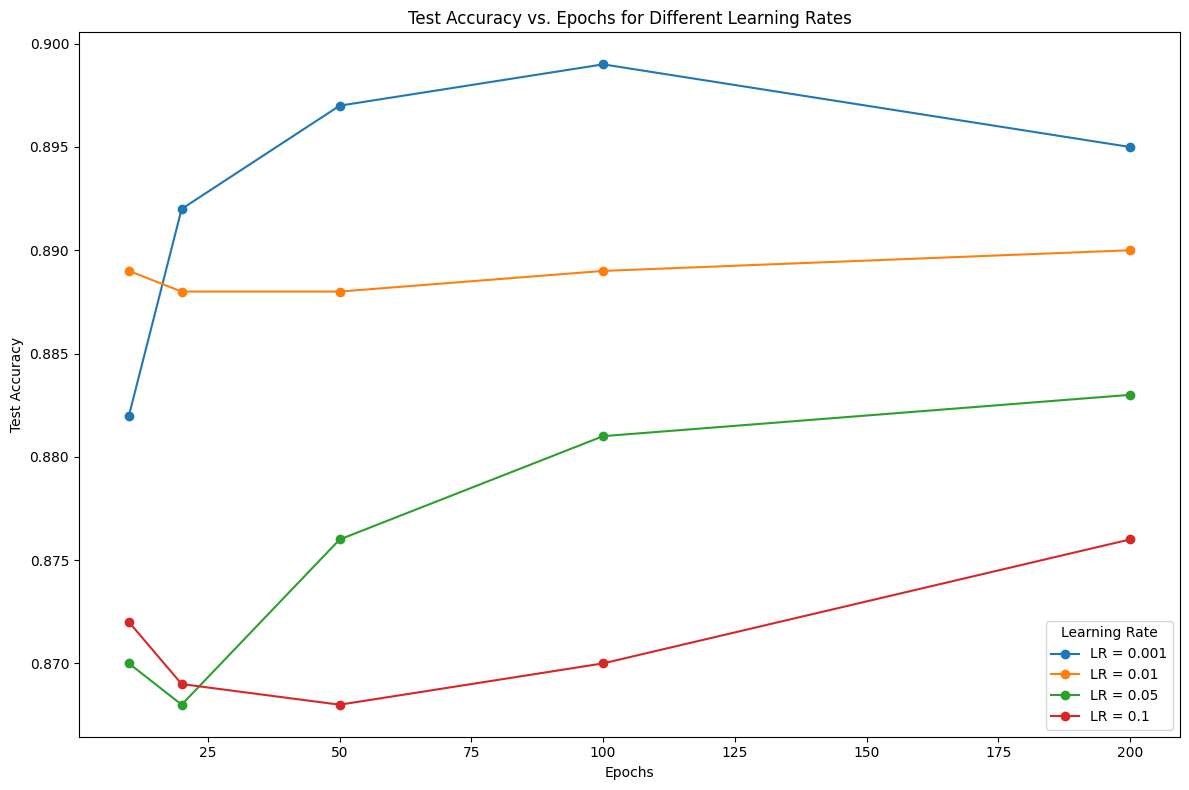

In [6]:
train_in = pd.read_csv('sample_data/dataset/train_in.csv', header=None).to_numpy()
train_out = pd.read_csv('sample_data/dataset/train_out.csv', header=None).to_numpy().flatten()

test_in = pd.read_csv('sample_data/dataset/test_in.csv', header=None).to_numpy()
test_out = pd.read_csv('sample_data/dataset/test_out.csv', header=None).to_numpy().flatten()

# create a perceptron neural network
nodes_number = 10
inputs_number = 256
learning_rate = 0.05
epochs = 20
perceptron = MultiClassPerceptron(nodes_number, inputs_number, learning_rate, epochs)

# train the neural network
perceptron.train(train_in, train_out)

# evaluate performance on the test set
perceptron.query(test_in, test_out)


# code to plot a graphs
learning_rates = [0.001, 0.01, 0.05, 0.1]
epochs_iterations = [10, 20, 50, 100, 200]

accuracy_results = []

for lr in learning_rates:
    accuracies = []
    for epochs in epochs_iterations:
        perceptron = MultiClassPerceptron(nodes_number, inputs_number, lr, epochs)
        perceptron.train(train_in, train_out)

        test_accuracy = perceptron.query(test_in, test_out)
        accuracies.append(test_accuracy)

    accuracy_results.append(accuracies)

# Plot the results
plt.figure(figsize=(12, 8))

for i, lr in enumerate(learning_rates):
    plt.plot(epochs_iterations, accuracy_results[i], marker='o', label=f'LR = {lr}')

plt.title('Test Accuracy vs. Epochs for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.legend(title='Learning Rate', loc='lower right')

plt.tight_layout()
plt.show()

# The XOR network and the Gradient Descent Algorithm

In [ ]:
import numpy as np


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def tanh(x):
    return np.tanh(x)

def ReLU(x):
    return np.maximum(0, x)

def xor_net(inputs, weightsLayer1, weightsLayer2,  biasLayer1, biasLayer2):
    # Calculate hidden layer activations
    hidden_layer_output = sigmoid(np.dot(inputs,  weightsLayer1) + biasLayer1)

    # Calculate output
    predicted_output = sigmoid(np.dot(hidden_layer_output, weightsLayer2) + biasLayer2)

    return hidden_layer_output, predicted_output

def mse(true_lables, predicted_lables):
    mse = np.mean((true_lables - predicted_lables) ** 2)

    return mse


inputs = np.array([
            [0, 0],
            [0, 1],
            [1, 0],
            [1, 1]
        ])

#Labels
labels = np.array([[0], [1], [1], [0]])


# Initialize the weights and biases with random values
inputSize = 2
noNeuronsLayer1 = 2
noNeuronsLayer2 = 1

weightsLayer1 = np.random.uniform(-0.1, 0.1, size=(inputSize, noNeuronsLayer1))
weightsLayer2 = np.random.uniform(-0.1, 0.1, size=(noNeuronsLayer1, noNeuronsLayer2))

biasLayer1 = np.random.uniform(size=(1, noNeuronsLayer1))
biasLayer2 = np.random.uniform(size=(1, noNeuronsLayer2))

# # Method 2: Xavier/Glorot initialization
# xavier_stddev1 = np.sqrt(1.0 / (inputSize + noNeuronsLayer1))
# xavier_stddev2 = np.sqrt(1.0 / (noNeuronsLayer1 + noNeuronsLayer2))
# weightsLayer1 = np.random.normal(0, xavier_stddev1, (inputSize, noNeuronsLayer1))
# weightsLayer2 = np.random.normal(0, xavier_stddev2, (noNeuronsLayer1, noNeuronsLayer2))
#
# biasLayer1 = np.zeros((1, noNeuronsLayer1))
# biasLayer2 = np.zeros((1, noNeuronsLayer2))


noEpochs = 5000
learningRate = 0.5
mse_values = []
misclassified_counts = []


# Train the network for noEpochs
for epoch in range(noEpochs):
    'Forward Propagation'
    hidden_layer_output, predicted_output = xor_net(inputs, weightsLayer1, weightsLayer2,  biasLayer1, biasLayer2)

    'Monitor the MSE and misclassified inputs'
    # Calculate mean squared error
    mean_squared_error = mse(labels, predicted_output)
    mse_values.append(mean_squared_error)

    # Calculate the number of misclassified inputs
    predicted_labels = (predicted_output > 0.5).astype(int)
    misclassified_count = np.sum(np.abs(predicted_labels - labels))
    misclassified_counts.append(misclassified_count)

    'Backpropagation: Here the gradient of the MSE error function is calculated'
#    a)	d_predicted_output = 2 * (predicted_output - labels) * predicted_output * (1 - predicted_output)
# •	2 * (predicted_output - labels):  This term calculates the error between the predicted output and the actual labels. Multiplying by 2 is a common practice in backpropagation to simplify the gradient descent step.
# •	predicted_output * (1 - predicted_output): This part accounts for the derivative of the sigmoid activation function used.
#   b)	d_hidden_layer = d_predicted_output.dot(weightsLayer2.T) * hidden_layer_output * (1 - hidden_layer_output)
# •	d_predicted_output.dot(weightsLayer2.T): This multiplication propagates the gradient from the output layer back to the hidden layer. It represents how the hidden layer's activations contributed to the output layer's error.
# •	hidden_layer_output * (1 - hidden_layer_output): Similar to the output layer, this accounts for the derivative of the activation function used in the hidden layer.

    # using sigmoid activation function
    d_predicted_output = 2 * (predicted_output - labels) * predicted_output * (1 - predicted_output)
    d_hidden_layer = d_predicted_output.dot(weightsLayer2.T) * hidden_layer_output * (1 - hidden_layer_output)

    # # using tanh activation function
    # d_predicted_output = 2 * (predicted_output - labels) * (1 - np.square(predicted_output))
    # d_hidden_layer = d_predicted_output.dot(weightsLayer2.T) * (1 - np.square(hidden_layer_output))

    # # using ReLU activation function
    # d_predicted_output = 2 * (predicted_output - labels) * np.where(predicted_output>0, 1, 0)
    # d_hidden_layer = d_predicted_output.dot(weightsLayer2.T) * np.where(hidden_layer_output>0, 1, 0)

    'Updating Weights and Biases'
    weightsLayer2 -= learningRate * hidden_layer_output.T.dot(d_predicted_output)
    biasLayer2 -= learningRate * np.sum(d_predicted_output, axis=0, keepdims=True)

    weightsLayer1 -= learningRate * inputs.T.dot(d_hidden_layer)
    biasLayer1 -= learningRate * np.sum(d_hidden_layer, axis=0, keepdims=True)

    # Print the progress
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1}/{noEpochs} - MSE: {mean_squared_error:.4f} - Misclassified: {misclassified_count}")


# Print weights and bias
print("weightsLayer1 = {}".format(weightsLayer1))
print("biasesLayer1 = {}".format(biasLayer1))

print("weightsLayer2 = {}".format(weightsLayer2))
print("biasLayer2 = {}".format(biasLayer2))

# Display the results
for i in range(len(labels)):
    outL1 = sigmoid(np.dot(inputs[i], weightsLayer1) + biasLayer1)
    outL2 = sigmoid(np.dot(outL1, weightsLayer2) + biasLayer2)

    print("Input = {} - Predict = {} - Label = {}".format(inputs[i], outL2, labels[i]))

Epoch 100/5000 - MSE: 0.2500 - Misclassified: 2
Epoch 200/5000 - MSE: 0.2500 - Misclassified: 2
Epoch 300/5000 - MSE: 0.2500 - Misclassified: 2
Epoch 400/5000 - MSE: 0.2500 - Misclassified: 1
Epoch 500/5000 - MSE: 0.2500 - Misclassified: 1
Epoch 600/5000 - MSE: 0.2500 - Misclassified: 1
Epoch 700/5000 - MSE: 0.2499 - Misclassified: 1
Epoch 800/5000 - MSE: 0.2498 - Misclassified: 1
Epoch 900/5000 - MSE: 0.2496 - Misclassified: 1
Epoch 1000/5000 - MSE: 0.2484 - Misclassified: 1
Epoch 1100/5000 - MSE: 0.2404 - Misclassified: 1
Epoch 1200/5000 - MSE: 0.2066 - Misclassified: 1
Epoch 1300/5000 - MSE: 0.1545 - Misclassified: 1
Epoch 1400/5000 - MSE: 0.0301 - Misclassified: 0
Epoch 1500/5000 - MSE: 0.0115 - Misclassified: 0
Epoch 1600/5000 - MSE: 0.0067 - Misclassified: 0
Epoch 1700/5000 - MSE: 0.0047 - Misclassified: 0
Epoch 1800/5000 - MSE: 0.0036 - Misclassified: 0
Epoch 1900/5000 - MSE: 0.0029 - Misclassified: 0
Epoch 2000/5000 - MSE: 0.0024 - Misclassified: 0
Epoch 2100/5000 - MSE: 0.0020

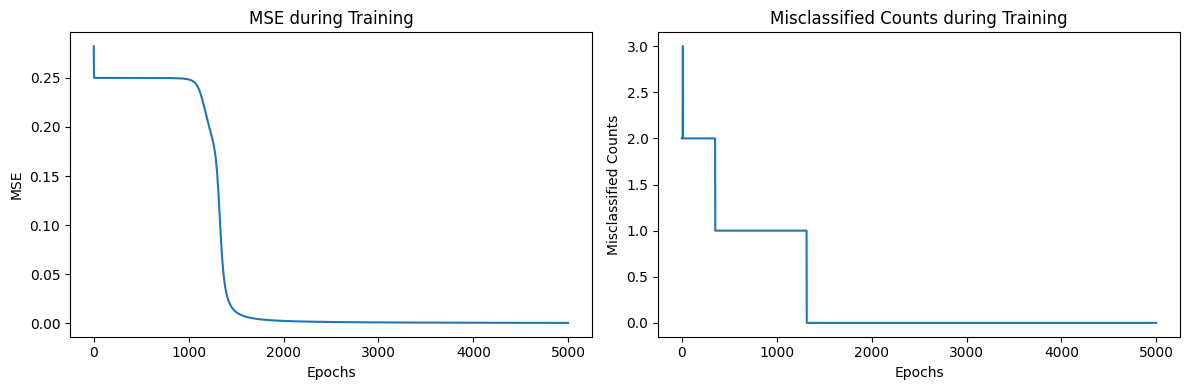

In [ ]:
# Plot the MSE and misclassified counts
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(noEpochs), mse_values)
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("MSE during Training")

plt.subplot(1, 2, 2)
plt.plot(range(noEpochs), misclassified_counts)
plt.xlabel("Epochs")
plt.ylabel("Misclassified Counts")
plt.title("Misclassified Counts during Training")

plt.tight_layout()
plt.show()